In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import *

## PLOT DA FARE: 
1. Metti a confronto per ogni modello le curve di speedup così da fare vedere l'impatto del miniatch;
2. Per ogni minibatch confronta le curve di speedup tra i vari modelli così da mostrare l'impatto del modello.

#TODO: Cambia i parametri delle varie chiamate di speedup (devi considerare il programma con un solo worker) -> scalabilità standard

## Altre Statistiche:
1. Quantità di memoria usata;
2. Dati trasmessi tramite la rete.

# Minibatch Comparison

In [3]:
data_tp1 = {
    "epoch": [0, 0, 0, 0],
    "batch_id": [0, 1, 2, 3],
    "loss": [4.8, 4.75, 4.7, 4.65],
    "forward_time": [3.8, 3.2, 3.0, 3.1],  # higher times
    "backward_time": [8.5, 7.9, 8.2, 8.0],
    "peak_memory_usage(MB)": [6100, 8000, 9600, 9500],
    "phase": ["train", "train", "train", "train"]
}

df_tp1 = pd.DataFrame(data_tp1)


ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]

ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model.csv")

ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]


ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]

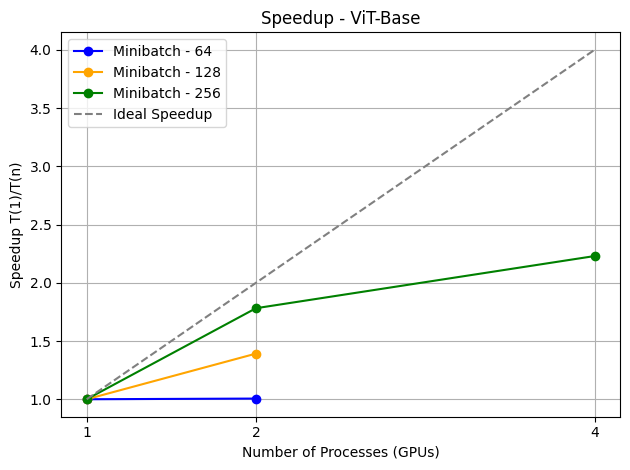

In [5]:
plot_speedup([ddp_2_64, ddp_4_64], "Speedup - ViT-Base", "Minibatch - 64", color='blue', plot_ideal=False)
plot_speedup([ddp_2_128, ddp_4_128], "Speedup - ViT-Base", "Minibatch - 128", color='orange', plot_ideal=False)
plot_speedup([ddp_2, ddp_4, ddp_8], "Speedup - ViT-Base", "Minibatch - 256", color='green', plot_ideal=True)

plt.tight_layout()

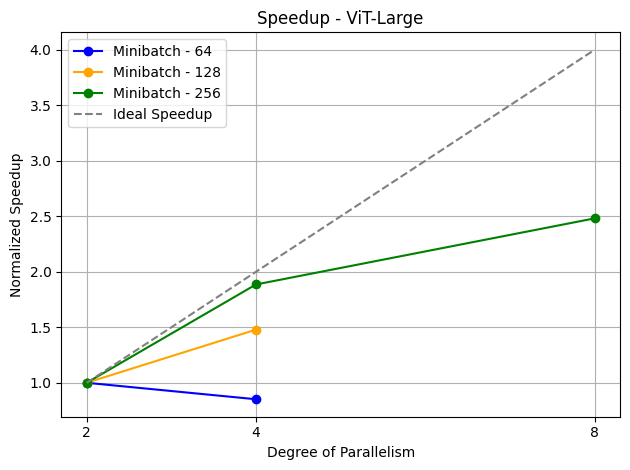

In [72]:
ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_2_64 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]
ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]
plot_speedup([ddp_2_64, ddp_4_64], "Speedup - ViT-Large", "Minibatch - 64", color='blue', plot_ideal=False)
plot_speedup([ddp_2_128, ddp_4_128], "Speedup - ViT-Large", "Minibatch - 128", color='orange', plot_ideal=False)
plot_speedup([ddp_2, ddp_4, ddp_8], "Speedup - ViT-Large", "Minibatch - 256", color='green', plot_ideal=True)
plt.tight_layout()

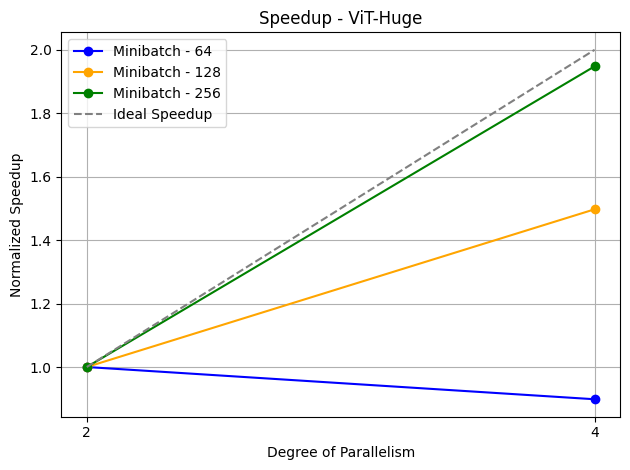

In [76]:
ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_2_64 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]
ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
# ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
# ddp_8 = ddp_8[ddp_8["phase"] == "train"]
plot_speedup([ddp_2_64, ddp_4_64], "Speedup - ViT-Huge", "Minibatch - 64", color='blue', plot_ideal=False)
plot_speedup([ddp_2_128, ddp_4_128], "Speedup - ViT-Huge", "Minibatch - 128", color='orange', plot_ideal=False)
plot_speedup([ddp_2, ddp_4], "Speedup - ViT-Huge", "Minibatch - 256", color='green', plot_ideal=True)
plt.tight_layout()

# Model Comparison

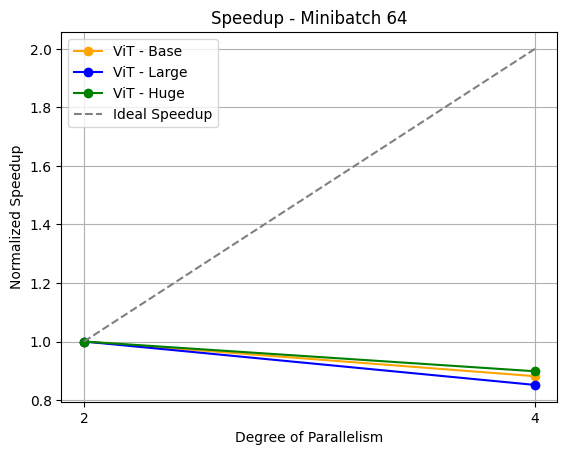

In [67]:
ddp_2_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")

ddp_2_base = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model.csv")
ddp_4_base = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model.csv")

ddp_2_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")

ddp_2_large = ddp_2_large[ddp_2_large["phase"] == "train"]
ddp_4_large = ddp_4_large[ddp_4_large["phase"] == "train"]
ddp_2_base = ddp_2_base[ddp_2_base["phase"] == "train"]
ddp_4_base = ddp_4_base[ddp_4_base["phase"] == "train"]
ddp_2_huge = ddp_2_huge[ddp_2_huge["phase"] == "train"]
ddp_4_huge = ddp_4_huge[ddp_4_huge["phase"] == "train"]

plot_speedup([ddp_2_base, ddp_4_base], "Speedup - Minibatch 64", "ViT - Base", color='orange', plot_ideal=False)
plot_speedup([ddp_2_large, ddp_4_large], "Speedup - Minibatch 64", "ViT - Large", color='blue', plot_ideal=False)
plot_speedup([ddp_2_huge, ddp_4_huge], "Speedup - Minibatch 64", "ViT - Huge", color='green', plot_ideal=True)

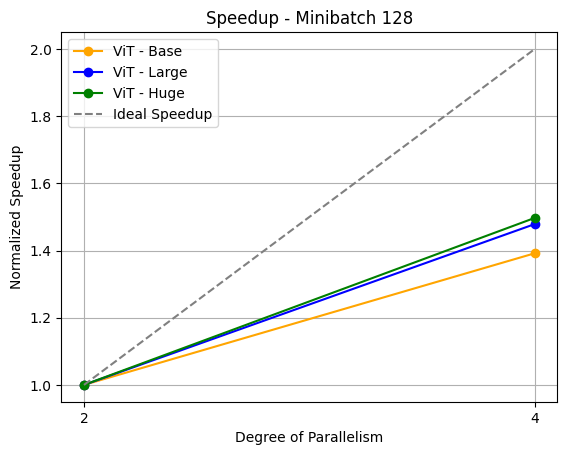

In [68]:
ddp_2_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_2_base = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_4_base = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_2_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_2_large = ddp_2_large[ddp_2_large["phase"] == "train"]
ddp_4_large = ddp_4_large[ddp_4_large["phase"] == "train"]  
ddp_2_base = ddp_2_base[ddp_2_base["phase"] == "train"]
ddp_4_base = ddp_4_base[ddp_4_base["phase"] == "train"]
ddp_2_huge = ddp_2_huge[ddp_2_huge["phase"] == "train"]
ddp_4_huge = ddp_4_huge[ddp_4_huge["phase"] == "train"]
plot_speedup([ddp_2_base, ddp_4_base], "Speedup - Minibatch 128", "ViT - Base", color='orange', plot_ideal=False)
plot_speedup([ddp_2_large, ddp_4_large], "Speedup - Minibatch 128", "ViT - Large", color='blue', plot_ideal=False)
plot_speedup([ddp_2_huge, ddp_4_huge], "Speedup - Minibatch 128", "ViT - Huge", color='green', plot_ideal=True)

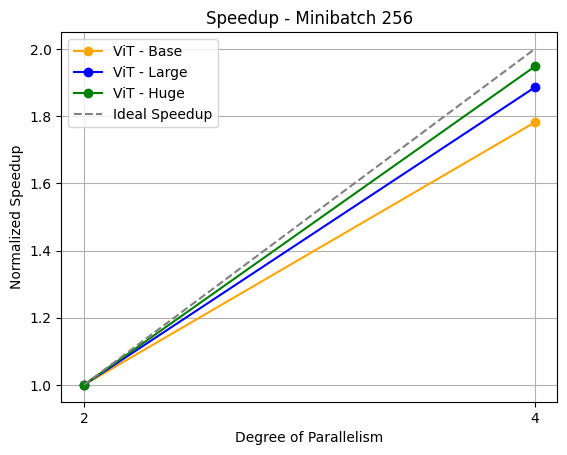

In [69]:
ddp_2_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_2_base = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_4_base = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_2_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_4_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_2_large = ddp_2_large[ddp_2_large["phase"] == "train"]
ddp_4_large = ddp_4_large[ddp_4_large["phase"] == "train"]
ddp_2_base = ddp_2_base[ddp_2_base["phase"] == "train"]
ddp_4_base = ddp_4_base[ddp_4_base["phase"] == "train"]
ddp_2_huge = ddp_2_huge[ddp_2_huge["phase"] == "train"]
ddp_4_huge = ddp_4_huge[ddp_4_huge["phase"] == "train"]
plot_speedup([ddp_2_base, ddp_4_base], "Speedup - Minibatch 256", "ViT - Base", color='orange', plot_ideal=False)
plot_speedup([ddp_2_large, ddp_4_large], "Speedup - Minibatch 256", "ViT - Large", color='blue', plot_ideal=False)
plot_speedup([ddp_2_huge, ddp_4_huge], "Speedup - Minibatch 256", "ViT - Huge", color='green', plot_ideal=True)

# Memory Usage
Fai grouped bar plot. Una figure per modello

In [14]:
# ViT Base
ddp_2_64 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model.csv")
ddp_4_64 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model.csv")

ddp_2_128 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_4_128 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model.csv")

ddp_2_256 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_4_256 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_8_256 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_2_64 = ddp_2_64[ddp_2_64["phase"] == "train"]
ddp_4_64 = ddp_4_64[ddp_4_64["phase"] == "train"]
ddp_2_128 = ddp_2_128[ddp_2_128["phase"] == "train"]
ddp_4_128 = ddp_4_128[ddp_4_128["phase"] == "train"]
ddp_2_256 = ddp_2_256[ddp_2_256["phase"] == "train"]
ddp_4_256 = ddp_4_256[ddp_4_256["phase"] == "train"]
ddp_8_256 = ddp_8_256[ddp_8_256["phase"] == "train"]

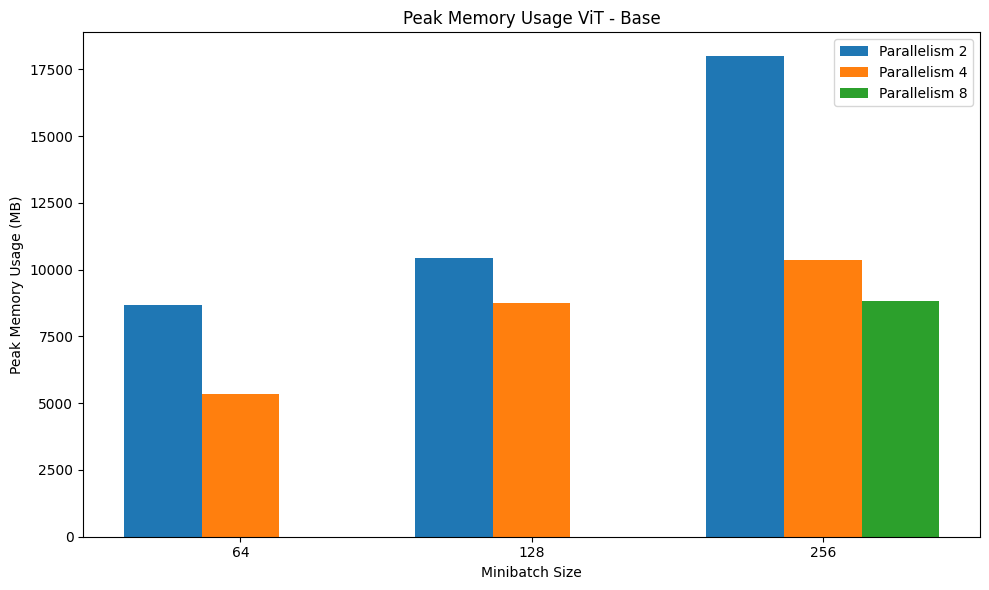

In [21]:
memory_data = {
    64: {2: ddp_2_64, 4: ddp_4_64},
    128: {2: ddp_2_128, 4: ddp_4_128},
    256: {2: ddp_2_256, 4: ddp_4_256, 8: ddp_8_256}
}

plot_memory_usage(memory_data, "Peak Memory Usage ViT - Base")

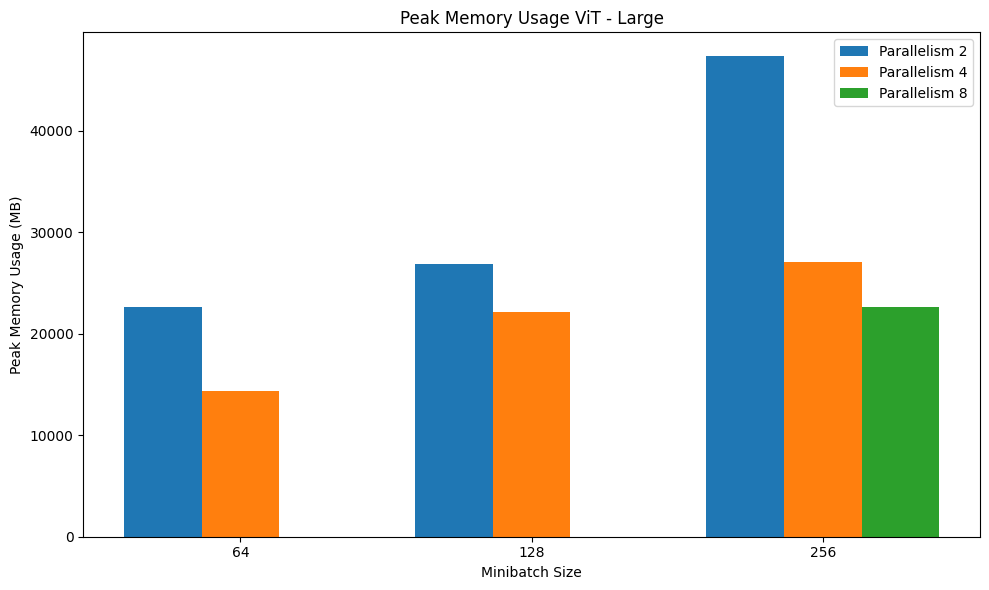

In [22]:
# ViT Large
ddp_2_64_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4_64_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_2_128_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4_128_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_2_256_large = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4_256_large = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_8_256_large = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_2_64_large = ddp_2_64_large[ddp_2_64_large["phase"] == "train"]
ddp_4_64_large = ddp_4_64_large[ddp_4_64_large["phase"] == "train"]
ddp_2_128_large = ddp_2_128_large[ddp_2_128_large["phase"] == "train"]
ddp_4_128_large = ddp_4_128_large[ddp_4_128_large["phase"] == "train"]
ddp_2_256_large = ddp_2_256_large[ddp_2_256_large["phase"] == "train"]
ddp_4_256_large = ddp_4_256_large[ddp_4_256_large["phase"] == "train"]
ddp_8_256_large = ddp_8_256_large[ddp_8_256_large["phase"] == "train"]
memory_data_large = {
    64: {2: ddp_2_64_large, 4: ddp_4_64_large},
    128: {2: ddp_2_128_large, 4: ddp_4_128_large},
    256: {2: ddp_2_256_large, 4: ddp_4_256_large, 8: ddp_8_256_large}
}
plot_memory_usage(memory_data_large, "Peak Memory Usage ViT - Large")

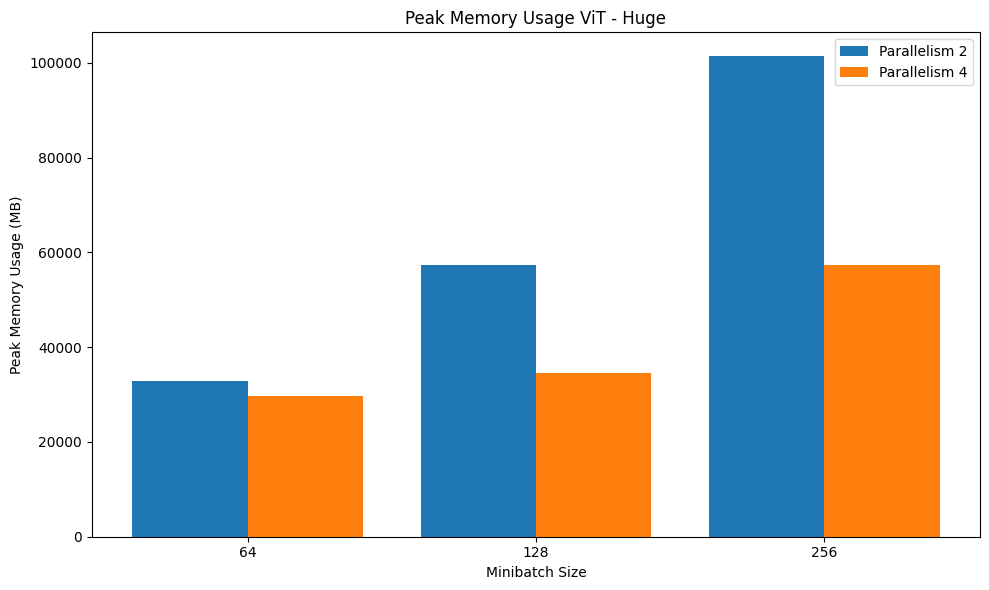

In [23]:
# ViT Huge
ddp_2_64_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4_64_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_2_128_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4_128_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_2_256_huge = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_4_256_huge = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-huge-patch14-224-in21k_model.csv")
ddp_2_64_huge = ddp_2_64_huge[ddp_2_64_huge["phase"] == "train"]
ddp_4_64_huge = ddp_4_64_huge[ddp_4_64_huge["phase"] == "train"]
ddp_2_128_huge = ddp_2_128_huge[ddp_2_128_huge["phase"] == "train"]
ddp_4_128_huge = ddp_4_128_huge[ddp_4_128_huge["phase"] == "train"]
ddp_2_256_huge = ddp_2_256_huge[ddp_2_256_huge["phase"] == "train"]
ddp_4_256_huge = ddp_4_256_huge[ddp_4_256_huge["phase"] == "train"]
memory_data_huge = {
    64: {2: ddp_2_64_huge, 4: ddp_4_64_huge},
    128: {2: ddp_2_128_huge, 4: ddp_4_128_huge},
    256: {2: ddp_2_256_huge, 4: ddp_4_256_huge}
}
plot_memory_usage(memory_data_huge, "Peak Memory Usage ViT - Huge")